<font color="#a9a56c" size=2> **@Author: Arif Kasim Rozani - (Team Operation Badar)** </font>


**Introduction to Asyncio in Python**
=====================================

Asyncio is a library in Python that allows you to write single-threaded concurrent code using coroutines, multiplexing I/O access over sockets and other resources, and implementing network clients and servers.


Imagine you're cooking a meal and while you're waiting for water to boil, you start chopping vegetables. Asyncio in Python works similarly—it lets your program switch between tasks instead of just waiting around for one task to finish.

In simple terms, asyncio is a tool that helps your Python program manage multiple jobs at the same time, even if it only has one "worker" (or thread). When one task is slow (like waiting for data from the internet), asyncio lets your program work on something else until the first task is ready to continue.

**Asyncio in Python: A Simplified Explanation**
=====================================================

Imagine you're at a coffee shop, and you want to order a coffee and a pastry. There are two ways to do this:

1.  **Synchronous Approach**: You order the coffee, wait for it to be prepared, and then order the pastry. You can't do anything else until both orders are completed.
2.  **Asynchronous Approach**: You order the coffee and, while it's being prepared, you order the pastry. You can do other things, like checking your phone or chatting with a friend, until both orders are ready.

**Asyncio in Python works similarly to the asynchronous approach**. It allows your program to perform multiple tasks concurrently, improving efficiency and responsiveness.

**Key Concepts**
----------------

*   **Coroutines**: A coroutine is a special type of function that can suspend and resume its execution at specific points. Think of it as a task that can be paused and resumed.
*   **Event Loop**: The event loop is the central component of Asyncio. It manages the execution of coroutines, handling I/O operations and scheduling tasks.
*   **Tasks**: A task is a coroutine that's scheduled to run concurrently with other tasks.
*   **Futures**: A future represents the result of a task. You can wait for a future to complete, allowing you to retrieve the result of a task.

**Example: Making Coffee and Pastry**
------------------------------------

Let's create an example that demonstrates the synchronous and asynchronous approaches:

In [1]:
import asyncio
import time
import threading

# Synchronous approach
def make_coffee_sync():
    print(f"\tMaking coffee... : Thread Name: {threading.current_thread().name}")
    time.sleep(2)  # Simulate coffee preparation time
    print("\tCoffee is ready!")

def make_pastry_sync():
    print(f"\tMaking pastry... : Thread Name: {threading.current_thread().name}")
    time.sleep(3)  # Simulate pastry preparation time
    print("\tPastry is ready!")

def order_sync():
    make_coffee_sync()
    make_pastry_sync()

# Asynchronous approach using Asyncio
async def make_coffee_async():
    print(f"\tMaking coffee... : Thread Name: {threading.current_thread().name}")
    await asyncio.sleep(2)  # Simulate coffee preparation time
    print("\tCoffee is ready!")

async def make_pastry_async():
    print(f"\tMaking pastry... : Thread Name: {threading.current_thread().name}")
    await asyncio.sleep(3)  # Simulate pastry preparation time
    print("\tPastry is ready!")

async def order_async():
    tasks = [
        asyncio.create_task(make_coffee_async()),
        asyncio.create_task(make_pastry_async())
    ]
    await asyncio.gather(*tasks)

# Run the synchronous example
print("Synchronous approach:")
start_time = time.time()

print("Main thread entring order_sync()")
order_sync()
print("Main thread exiting order_sync()")

print(f"Total time: {time.time() - start_time} seconds")

# Run the asynchronous example
print("\nAsynchronous approach:")
start_time = time.time()



print("Main thread entring order_async()")
#asyncio.run(order_async()) # This will work in stand alone IDE (VSCode, Cursor)

# Instead of creating and setting a new event loop,
# get the current running loop in the notebook
await asyncio.create_task(order_async()) # Workaround for Colab, # Option 2: schedule as a background task
# Use asyncio.run or create_task to schedule your coroutine
# within the existing event loop
# asyncio.run(order_async()) # Option 1: if no other async tasks are running
# You should not try to create a new event loop or set it as the running loop within a Jupyter Notebook.
print("Main thread exiting order_async()")

print(f"Total time: {time.time() - start_time} seconds")

Synchronous approach:
Main thread entring order_sync()
	Making coffee... : Thread Name: MainThread
	Coffee is ready!
	Making pastry... : Thread Name: MainThread
	Pastry is ready!
Main thread exiting order_sync()
Total time: 5.0010826587677 seconds

Asynchronous approach:
Main thread entring order_async()
	Making coffee... : Thread Name: MainThread
	Making pastry... : Thread Name: MainThread
	Coffee is ready!
	Pastry is ready!
Main thread exiting order_async()
Total time: 3.002889633178711 seconds


In the synchronous example, the `make_coffee_sync` and `make_pastry_sync` functions are called sequentially, resulting in a total execution time of 5 seconds.

In the asynchronous example, the `make_coffee_async` and `make_pastry_async` coroutines are run concurrently using `asyncio.create_task` and `asyncio.gather`. This reduces the total execution time to approximately 3 seconds, as the coffee and pastry are prepared simultaneously.

**Best Practices**
------------------

*   **Use `asyncio.run()`**: Run your asynchronous code using `asyncio.run()` to ensure proper event loop setup and teardown.
*   **Await Coroutines**: Use the `await` keyword to wait for the completion of coroutines.
*   **Use `asyncio.gather()`**: Run multiple coroutines concurrently using `asyncio.gather()`.

**Common Asyncio Functions**
---------------------------

*   `asyncio.sleep()`: Suspends the execution of the current coroutine for a specified amount of time.
*   `asyncio.create_task()`: Creates a new task from a coroutine, allowing it to run concurrently.
*   `asyncio.gather()`: Runs multiple coroutines concurrently and returns their results as a list.

By following these guidelines and using Asyncio effectively, you can write efficient and responsive asynchronous code in Python.

## **Understanding `asyncio` and `await`**

`asyncio` provides the event loop and tools to manage async operations, while `await` is the keyword that allows functions to yield control at specific points, enabling non-blocking waits. Using them together allows writing efficient `single-threaded concurrent code`, especially for I/O-bound tasks.

To address the question of understanding `asyncio` and `await` in Python, let's break down the concepts and their usage:

### Understanding `asyncio` and `await`

1. **Asyncio**:

   - **Definition**: Asyncio is a Python library that facilitates writing single-threaded concurrent code using coroutines, multiplexing I/O access over sockets, and other resources. It's ideal for handling I/O-bound tasks, such as network requests or database queries.

   - **Key Components**:
     - **Event Loop**: Manages the scheduling and switching between tasks.

     - **Coroutines**: Functions defined with `async def` that can suspend and resume execution.
     - **Tasks**: Used to run coroutines concurrently.
     - **Futures**: Represent the result of a task that may not have completed yet.(we will discuss `futures` later on)

2. **Await**:

   - **Definition**: `await` is a keyword used within async functions to suspend the execution of the coroutine until the awaited task is complete. It allows the event loop to handle other tasks while waiting.

   - **Usage**: It is used to wait for coroutines, tasks, or futures, enabling non-blocking operations.

### Difference Between `asyncio` and `await`

- **Asyncio**: The library provides the framework for asynchronous operations, including the event loop and tools for creating and managing tasks.
- **Await**: The keyword used within async functions to create points where execution can yield control back to the event loop, allowing other tasks to run.

### Using Them Together

1. **Basic Structure**:
   - Define an async function using `async def`.
   - Use `await` within the function to wait for coroutines.
   - Run the top-level async function with `asyncio.run()`.
   

2. **Example**:

In [ ]:
import asyncio

async def my_function():
  await asyncio.sleep(4)
  print("Hello")

async def main():
  await my_function()

#asyncio.run(main())
await asyncio.create_task(main())

Hello


In [ ]:
import asyncio

async def task1():
       await asyncio.sleep(4)
       print("Task 1 done")

async def task2():
       await asyncio.sleep(1)
       print("Task 2 done")

async def main():
       t1 = asyncio.create_task(task1())
       t2 = asyncio.create_task(task2())
       print(t2)
       await asyncio.gather(t1, t2)

#asyncio.run(main())
await asyncio.create_task(main())

<Task pending name='Task-25' coro=<task2() running at <ipython-input-6-59354714ae6a>:7>>
Task 2 done
Task 1 done


### Implications

- **Efficiency**: Ideal for I/O-bound tasks, allowing efficient handling of multiple operations without blocking.

- **Single-Threaded**: Not suitable for CPU-bound tasks, which may require multiprocessing.
- **Correct Usage**: Ensure all coroutines are awaited properly to avoid returning coroutine objects instead of results.

### Conclusion

`asyncio` and `await` work together to enable asynchronous programming in Python, allowing for efficient handling of concurrent operations, particularly in I/O-bound scenarios. Understanding their roles and correct usage is key to writing effective async code.

## **Futures**



---



In Python's `asyncio` library, **Futures** are a fundamental concept that represents the result of an asynchronous operation that may not have completed yet. Futures are closely related to coroutines and tasks, but they serve a specific purpose in handling asynchronous operations.

### **What Are Futures**?

A **Future** is an object that represents the result of a task that is not yet complete. It acts as a placeholder for the result, which will be available at some point in the future. Once the task completes, the Future is resolved, and its result (or exception, if the task failed) can be retrieved.

### **Key Characteristics of Futures**

1. **Asynchronous Result**:
   - A Future is created when an asynchronous operation is initiated, but the result of that operation is not immediately available.
   - The Future keeps track of the result and notifies any waiting code once the result is available.

2. **States of a Future**:
   - **Pending**: The initial state where the operation has not yet started or is still in progress.
   - **Done**: The operation has completed, and the result is available.
   - **Cancelled**: The operation was cancelled before it could complete.

3. **Awaitable**:
   - Futures are awaitable objects, meaning they can be used with the `await` keyword in async functions.

4. **One-Time Use**:
   - A Future can only be resolved once. Once it is done, it cannot be reset or reused.

### **Relationship Between Futures, Coroutines, and Tasks**

- **Coroutines**: Defined using `async def`, coroutines are functions that can be paused and resumed. They are not directly executable and must be scheduled as tasks.
  
- **Tasks**: A Task wraps a coroutine and is responsible for running it. When you create a Task, it automatically schedules the coroutine to run on the event loop. A Task returns a Future that represents the result of the coroutine.

- **Futures**: A Future is the result of a Task. When you await a Task, you are effectively awaiting its Future.

### **Example of Using Futures**

Here’s an example that demonstrates how Futures work:

In [ ]:
import asyncio

async def my_coroutine():
    await asyncio.sleep(1)
    return "Coroutine completed"

async def main():
    # Create a Task (which returns a Future)
    future = asyncio.create_task(my_coroutine())
    print("future: ",future)
    print("Going to Maldives on a 2 day vacation")
    await asyncio.sleep(5)
    print("Come back from vacation")


    # Await the Future
    result = await future
    print(result)

#asyncio.run(main())
await asyncio.create_task(main())

future:  <Task pending name='Task-28' coro=<my_coroutine() running at <ipython-input-7-623f1bf2d1fe>:3>>
Going to Maldives on a 2 day vacation
Come back from vacation
Coroutine completed


**Introduction to Threads**
==========================

Threads are a fundamental concept in programming, allowing multiple tasks to run concurrently within a single program. In this tutorial, we will cover the basics of threads, their benefits, and how to use them effectively.



---


**What are Threads?**
--------------------

A thread is a separate flow of execution within a program, allowing multiple tasks to run simultaneously. Each thread has its own program counter, stack, and local variables, but shares the same memory space as other threads.


**Key Concepts of Threading**

1.  **Thread**: A thread is the smallest unit of a process that can be scheduled and executed. Threads within the same process share the same memory space.

2.  **Concurrency**: Python threads run in the same process concurrently. However, due to the Global Interpreter Lock (GIL), only one thread executes Python bytecode at a time.

3.  **Use Cases**: Threading is best suited for:
    * I/O-bound tasks (e.g., file reading/writing, network requests).
    * Tasks that involve waiting for external resources.

**Note**: For CPU-bound tasks, consider using the multiprocessing module instead.

## **Understanding The Concept of Concurrency and Parallelism**

**Concurrency: switching between tasks, giving the illusion of simultaneous execution.

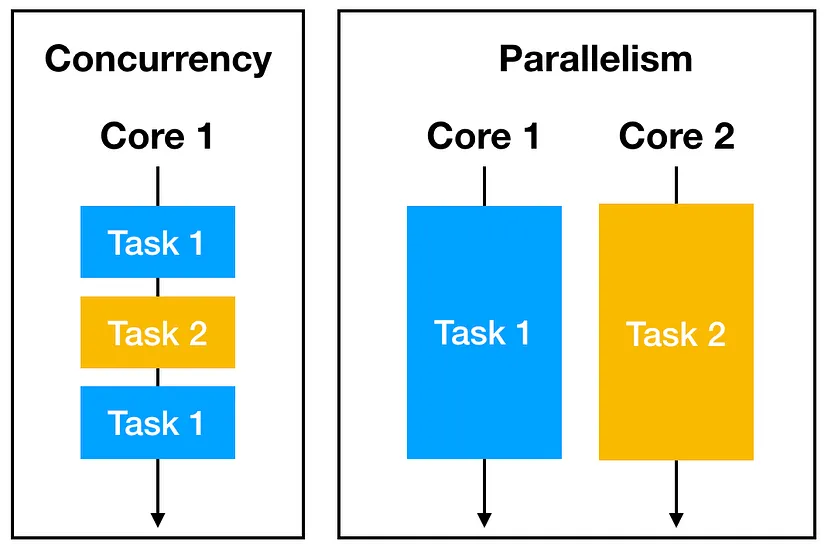

[Source: Threading vs Multiprocessing in Python: A Comprehensive Guide](https://medium.com/@arjunprakash027/threading-vs-multiprocessing-in-python-a-comprehensive-guide-cae3ce0ca6c1)

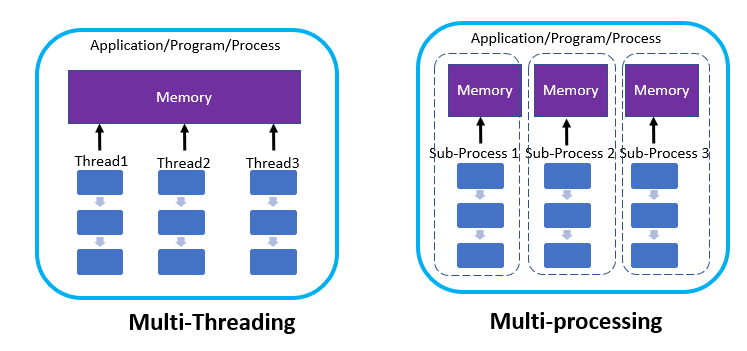

Concurrency and parallelism are two important concepts in programming, particularly when dealing with tasks that can be executed simultaneously. While they are often used interchangeably, they refer to different approaches to handling multiple tasks. Here’s a breakdown of both concepts in the context of Python:

## **Concurrency**

**Definition**:

Concurrency is the ability of a program to manage multiple tasks at the same time. It does not necessarily mean that the tasks are being executed simultaneously; rather, it means that the program can switch between tasks, giving the illusion of simultaneous execution.

**Key Points**:

- **Single Core**:

     Concurrency can be achieved on a single-core processor by interleaving the execution of tasks. The operating system can switch between tasks, allowing one task to run while another is waiting (e.g., for I/O operations).

- **I/O-Bound Tasks**:

     Concurrency is particularly useful for I/O-bound tasks, such as network requests, file I/O, or database queries, where tasks spend a significant amount of time waiting for external resources.


- **Threading and Asyncio**:

     In Python, concurrency can be achieved using threads (via the threading module) or asynchronous programming (via the asyncio module). Both approaches allow for managing multiple tasks without blocking the main thread.

**Thread States**
----------------

A thread can be in one of the following states:

1. **New**: The thread is created but not yet started.
2. **Runnable**: The thread is running and executing its instructions.
3. **Blocked**: The thread is waiting for a resource, such as a lock or I/O operation.
4. **Waiting**: The thread is waiting for a specific condition to be met, such as a notification or timeout.
5. **Timed Waiting**: The thread is waiting for a specific condition to be met, with a timeout.
6. **Terminated**: The thread has completed its execution and is no longer running.

**Thread Synchronization**
-------------------------

Thread synchronization is the process of coordinating the execution of multiple threads to ensure data consistency and prevent conflicts. Common synchronization techniques include:

1. **Locks**: A lock is a mechanism that allows only one thread to access a shared resource at a time.
2. **Semaphores**:(*seh.muh.forz*) A semaphore is a variable that controls the access to a shared resource, allowing a limited number of threads to access it simultaneously.
3. **Monitors**: A monitor is a synchronization construct that allows threads to synchronize their execution and access to shared resources.

**Thread Communication**
----------------------

Thread communication refers to the exchange of data between threads. Common techniques include:

1. **Shared Variables**: Shared variables are variables that can be accessed by multiple threads.
2. **Message Passing**: Message passing is a technique where threads communicate by sending and receiving messages.
3. **Pipes**: Pipes are a unidirectional communication channel that allows threads to send data to each other.


## **How to Use threading in Python**

### Basic Example

1.  **Thread Creation and Execution**:

  A new thread (my_thread) is created to run the print_numbers function, which prints numbers from 0 to 4 with a 1-second delay between each print. The thread is started using my_thread.start(), allowing it to run concurrently with the main thread.

2.  **Concurrency**:

      After starting the thread, the main thread continues executing its own code independently. The print statement "Main thread is still running!" is executed immediately after my_thread.start(), showing that both threads are running concurrently.

3.  **Main Thread Pauses Temporarily**:

      The time.sleep(3) in the main thread causes it to pause for 3 seconds while the print_numbers thread continues to execute in the background. During this time, numbers from the print_numbers function will be printed.
      
      `(I have change the sleep time to 0(zero)in example)`

4.  **Synchronization Using join()**:

      After the main thread resumes, it calls my_thread.join(). This causes the main thread to wait until the my_thread thread finishes its execution (i.e., finishes printing all numbers). This ensures that the main thread does not terminate prematurely.

5.  **Thread Completion**:

      Once the my_thread thread finishes executing the print_numbers function, control returns to the main thread, which then prints "Thread finished!", signaling the end of the program.

In [ ]:
import threading
import time

# Function to be run in a thread
def print_numbers():
    for i in range(5):
        print(f"Number: {i} : Thread Name: {threading.current_thread().name}")
        time.sleep(3) # change the sleep value, play and learn

# Create a thread
my_thread = threading.Thread(target=print_numbers, name='Worker Thread')

# Start the thread
my_thread.start()

# Main thread continues executing
print(f"After spawning other threads Main thread is continue doing its works! : Thread Name: {threading.current_thread().name}")

time.sleep(0) # change the sleep value, play and learn

print(f"Main thread is waiting for other threads to join: my_thread.join() : Thread Name: {threading.current_thread().name}")
# Wait for the thread to finish
my_thread.join()

print(f"Main thread starts executing becuase all other threads join main thread : Thread Name: {threading.current_thread().name}")

print(f"Main Thread finished! : Thread Name: {threading.current_thread().name}")

Number: 0 : Thread Name: Worker Thread
After spawning other threads Main thread is continue doing its works! : Thread Name: MainThread
Main thread is waiting for other threads to join: my_thread.join() : Thread Name: MainThread
Number: 1 : Thread Name: Worker Thread
Number: 2 : Thread Name: Worker Thread
Number: 3 : Thread Name: Worker Thread
Number: 4 : Thread Name: Worker Thread
Main thread starts executing becuase all other threads join main thread : Thread Name: MainThread
Main Thread finished! : Thread Name: MainThread


## **Lets Try To Understand The Difference Between `asyncio` and `threading`**

Both asyncio and the threading module in Python provide mechanisms for concurrency, but they do so in different ways and are suited for different types of tasks. Let's break down the differences between concurrency in asyncio and concurrency in threading.

## **Concurrency with asyncio**

1.  **Event-Driven Model**:

  - asyncio uses an event-driven model where a single thread runs an event loop. This loop manages the execution of multiple coroutines, allowing them to yield control back to the event loop when they are waiting for I/O operations to complete.

  - This means that while one coroutine is waiting (e.g., for a network response), the event loop can switch to another coroutine that is ready to run.

2.  **Coroutines**:

  - Coroutines are defined using the async def syntax and can be paused and resumed using the await keyword. This allows for cooperative multitasking, where coroutines voluntarily yield control.

  - This model is particularly efficient for I/O-bound tasks, such as network requests or file operations, where the program spends a lot of time waiting.

3.  **Single Thread**:

  - asyncio typically runs in a single thread, which means it does not take advantage of multiple CPU cores for CPU-bound tasks. However, it can handle many I/O-bound tasks concurrently without the overhead of thread management.

4.  **Use Cases**:

  - asyncio is ideal for applications that require handling many simultaneous I/O operations, such as web servers, web scraping, or any application that needs to manage multiple network connections.

## **Concurrency with threading**

1.  **Thread-Based Model**:

  - The threading module allows you to create multiple threads within a single process. Each thread can run independently and can be scheduled by the operating system to run on different CPU cores.

  - This model is suitable for both I/O-bound and CPU-bound tasks, as threads can run in parallel on multiple cores.

2.  **Preemptive Multitasking**:

  - Threads are managed by the operating system, which can preemptively switch between threads. This means that a thread can be interrupted and another thread can be scheduled to run, allowing for true parallel execution on multi-core systems.

3.  **Global Interpreter Lock (GIL)**:

  - In CPython (the standard implementation of Python), the Global Interpreter Lock (GIL) allows only one thread to execute Python bytecode at a time. This can limit the performance of CPU-bound tasks when using threads, as they cannot fully utilize multiple cores.

  - However, for I/O-bound tasks, threads can still be beneficial, as they can perform I/O operations while other threads are waiting.

4.  **Use Cases**:

  - The threading module is suitable for applications that require concurrent execution of tasks, such as GUI applications, network servers, or any application that needs to perform multiple tasks simultaneously.

Summary of Differences

| Aspect | asyncio | threading |
|-----------------------|------------------------------------|--------------------------------------|
| Model | Event-driven, single-threaded | Thread-based, multi-threaded |
| Task Type | Best for I/O-bound tasks | Suitable for both I/O-bound and CPU-bound tasks |
| Execution | Cooperative multitasking | Preemptive multitasking |
| Performance | Efficient for many concurrent I/O operations | Limited by GIL for CPU-bound tasks |
| Complexity | Requires understanding of async/await syntax | More straightforward for traditional threading |

<br>

## **Conclusion**

In summary, both asyncio and threading provide ways to achieve concurrency in Python, but they are suited for different types of tasks and have different execution models. asyncio is ideal for I/O-bound tasks that can benefit from cooperative multitasking, while threading is more versatile for both I/O-bound and CPU-bound tasks, albeit with some limitations due to the GIL in CPython. Understanding the strengths and weaknesses of each approach will help you choose the right one for your specific use case.

## **Creating Threads with a Class**

You can create a custom thread class by subclassing threading.Thread:

In [ ]:
import threading
import time

class MyThread(threading.Thread):
    def run(self):
        for i in range(5):
            print(f"Thread {threading.current_thread().name}: {i}")
            time.sleep(1)

# Create and start the thread
my_thread = MyThread(name="MyCustomThread")


# Wait for the thread to finish
my_thread.start()

# Wait for the thread to finish
my_thread.join()
print("Thread execution completed.")

Thread MyCustomThread: 0
Thread MyCustomThread: 1
Thread MyCustomThread: 2
Thread MyCustomThread: 3
Thread MyCustomThread: 4
Thread execution completed.


Here's a simple example of a multi-threaded program in Python. This program uses the `threading` module to create two threads that print numbers from 0 to 9 and letters from A to J, respectively.

In [ ]:
import threading
import time

def print_numbers():
    for i in range(10):
        time.sleep(2)  # simulate some work
        print(f"Thread {threading.current_thread().name}: Number: {i}")

def print_letters():
    for letter in "ABCDEFGHIJ":
        time.sleep(1)  # simulate some work
        print(f"Thread {threading.current_thread().name}: Letter: {letter}")

# Create two threads
thread1 = threading.Thread(target=print_numbers)
thread2 = threading.Thread(target=print_letters)

# Start the threads
thread1.start()
thread2.start()

# Wait for the threads to finish
thread1.join()
thread2.join()

print("Both threads have finished.")

Thread Thread-17 (print_letters): Letter: A
Thread Thread-16 (print_numbers): Number: 0
Thread Thread-17 (print_letters): Letter: B
Thread Thread-17 (print_letters): Letter: C
Thread Thread-16 (print_numbers): Number: 1
Thread Thread-17 (print_letters): Letter: D
Thread Thread-17 (print_letters): Letter: E
Thread Thread-16 (print_numbers): Number: 2
Thread Thread-17 (print_letters): Letter: F
Thread Thread-17 (print_letters): Letter: G
Thread Thread-16 (print_numbers): Number: 3
Thread Thread-17 (print_letters): Letter: H
Thread Thread-17 (print_letters): Letter: I
Thread Thread-16 (print_numbers): Number: 4
Thread Thread-17 (print_letters): Letter: J
Thread Thread-16 (print_numbers): Number: 5
Thread Thread-16 (print_numbers): Number: 6
Thread Thread-16 (print_numbers): Number: 7
Thread Thread-16 (print_numbers): Number: 8
Thread Thread-16 (print_numbers): Number: 9
Both threads have finished.


## **Daemon Threads**

A daemon thread runs in the background and is terminated automatically when the main thread exits. Use daemon threads for background tasks.

In [ ]:
import threading
import time

def background_task():
    while True:
        print("Background task is running...")
        time.sleep(1)

# Create a daemon thread
daemon_thread = threading.Thread(target=background_task, daemon=True)
daemon_thread.start()

time.sleep(3)
print("Main program exiting...")

Background task is running...
Background task is running...
Background task is running...
Background task is running...
Background task is running...
Background task is running...
Main program exiting...
Background task is running...


Output:
The background_task will stop running when the main program exits.



---



## **Thread Synchronization**

When multiple threads access shared resources (e.g., variables, files), synchronization is needed to avoid race conditions.

**Using Locks**

A Lock ensures that only one thread can access a critical section of code at a time.

In [ ]:
import threading

counter_1 = 0
counter_2 = 0
counter_lock = threading.Lock()

def increment_counter():
    global counter_1, counter_2

    for _ in range(100000):
        # Acquire lock before modifying the shared variable
        with counter_lock:
            counter_1 += 1
            counter_2 += 2

# Create two threads
thread1 = threading.Thread(target=increment_counter)
thread2 = threading.Thread(target=increment_counter)

# Start threads
thread1.start()
thread2.start()

# Wait for threads to finish
thread1.join()
thread2.join()

print(f"Final Counter Value: counter_1={counter_1} , counter_2={counter_2}")

Final Counter Value: counter_1=200000 , counter_2=400000


In [ ]:
import threading

# Shared resource
counter = 0

# Lock object
lock = threading.Lock()

def increment_counter():
    global counter
    with lock:  # Lock is automatically acquired and released
        counter += 1
    print(f"Counter: {counter}")

# Create and start 5 threads
threads = []
for _ in range(5):
    thread = threading.Thread(target=increment_counter, name="MyCustomThread")
    thread.start()
    threads.append(thread)

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("Waiting finish for main thread, all other thread joined main thread")

print(f"Final Counter: {counter}")

Counter: 1Counter: 2
Counter: 3

Counter: 4
Counter: 5
Waiting finish for main thread, all other thread joined main thread
Final Counter: 5


## **What is with?**

The with statement is used with objects that support the **context management** protocol, such as locks, files, etc. It ensures that resources are properly managed by performing setup and cleanup actions automatically.

The syntax with counter_lock: is a convenient way of acquiring and automatically releasing a lock in Python using the context manager protocol. This approach avoids the need to explicitly acquire and release the lock, reducing the chances of errors (like forgetting to release the lock in the case of an exception).

## **How Does It Work with Locks?**

When using with counter_lock:, the following happens:

1.  **Lock Acquisition:** The lock (counter_lock) is acquired before entering the block of code.

2.  **Execution:** The code inside the with block executes while the lock is held.
3.  **Lock Release:** The lock is automatically released when the block is exited, even if an exception occurs.

This eliminates the need to explicitly call counter_lock.acquire() and counter_lock.release().


Here’s an example of how with simplifies thread-safe code:

Without with:

In [ ]:
import threading

counter = 0
counter_lock = threading.Lock()

def increment_counter():
    global counter
    for _ in range(10000):
        counter_lock.acquire()  # Manually acquire the lock
        try:
            counter += 1
        finally:
            counter_lock.release()  # Manually release the lock

# Create and start threads
threads = [threading.Thread(target=increment_counter) for _ in range(2)]
for t in threads: t.start()
for t in threads: t.join()

print(f"Final Counter Value: {counter}")

Final Counter Value: 20000


## **Benefits of with counter_lock:**

1.  **Cleaner Code**: Avoids the need to explicitly acquire and release the lock.
2.  **Error Handling**: Ensures the lock is released even if an exception occurs.
3.  **Readability**: The intent of locking is more explicit and easier to understand.

## **Underlying Mechanism**

When you use with counter_lock:, the following happens:

1.  counter_lock.\_\_enter__() is called to acquire the lock.
2.  The code block executes.
3.  When the block is exited, counter_lock.\_\_exit__() is called to release the lock.
This is how the with statement works with all objects that implement the context management protocol (\_\_enter__ and \_\_exit__ methods).

## **Conclusion**

Using with counter_lock: is the preferred way to manage locks in Python because it is safer, more concise, and less error-prone. It ensures proper lock handling and improves the readability of your multithreaded code.



---


## **Thread Communication with queue.Queue**

The queue.Queue module in Python provides a thread-safe way to communicate between threads. It allows you to safely pass data between producer and consumer threads without the need for explicit locking mechanisms. This is particularly useful in scenarios where one or more threads are producing data (e.g., generating tasks) and one or more threads are consuming that data (e.g., processing tasks).

## **Example: Thread Communication with queue.Queue**

In this example, we will create a simple producer-consumer scenario where one thread produces numbers and puts them into a queue, while another thread consumes those numbers from the queue and processes them.

In [ ]:
import threading
import queue
import time
import random

# Function for the producer thread
def producer(q, num_items):
    for i in range(num_items):
        item = random.randint(1, 100)  # Produce a random number
        q.put(item)  # Put the item in the queue
        print(f"Produced: {item}")
        time.sleep(random.uniform(0.1, 0.5))  # Simulate variable production time
    q.put(None)  # Signal the consumer to stop

# Function for the consumer thread
def consumer(q):
    while True:
        item = q.get()  # Get an item from the queue
        if item is None:  # Check for the stop signal
            break
        print(f"Consumed: {item}")
        time.sleep(random.uniform(0.1, 0.5))  # Simulate variable processing time
    print("Consumer finished processing.")

if __name__ == "__main__":
    num_items = 10  # Number of items to produce
    q = queue.Queue()  # Create a queue

    # Create producer and consumer threads
    producer_thread = threading.Thread(target=producer, args=(q, num_items))
    consumer_thread = threading.Thread(target=consumer, args=(q,))

    # Start the threads
    producer_thread.start()
    consumer_thread.start()

    # Wait for the threads to finish
    producer_thread.join()
    consumer_thread.join()

    print("All threads have finished.")

Produced: 98
Consumed: 98
Produced: 74
Produced: 89
Background task is running...
Consumed: 74
Background task is running...
Produced: 83
Produced: 1
Consumed: 89
Produced: 96
Consumed: 83
Produced: 6
Background task is running...
Background task is running...
Produced: 85Consumed: 1

Consumed: 96
Produced: 6
Consumed: 6
Background task is running...
Produced: 86
Background task is running...Consumed: 85

Consumed: 6
Consumed: 86
Consumer finished processing.
All threads have finished.


## **Thread Safety of Common Python Objects**

| Object      | Thread-Safe | Reason                                                       |   |
|-------------|-------------|--------------------------------------------------------------|---|
| list        | No          | Mutable; concurrent modifications can cause race conditions. |   |
| dict        | No          | Mutable; requires synchronization for safe access.           |   |
| set         | No          | Mutable; concurrent modifications are not safe.              |   |
| frozenset   | Yes         | Immutable; safe for concurrent access.                       |   |
| int, str    | Yes         | Immutable; inherently thread-safe.                           |   |
| queue.Queue | Yes         | Designed for thread-safe communication.                      |   |

## **Thread Pooling with concurrent.futures**

The concurrent.futures module in Python provides a high-level interface for asynchronously executing callables using threads or processes. The ThreadPoolExecutor class allows you to manage a pool of threads, making it easier to execute tasks concurrently without having to manage the threads manually.

### **Example: Thread Pooling with concurrent.futures.ThreadPoolExecutor**

In this example, we will demonstrate how to use ThreadPoolExecutor to execute a function that simulates a time-consuming task concurrently across multiple threads.

In [ ]:
import concurrent.futures
import time
import random

# A function that simulates a time-consuming task
def task(n):
    sleep_time = random.uniform(0.5, 2.0)  # Random sleep time between 0.5 and 2 seconds
    print(f"Task {n} will sleep for {sleep_time:.2f} seconds.")
    time.sleep(sleep_time)
    return f"Task {n} completed."

if __name__ == "__main__":
    num_tasks = 10  # Number of tasks to execute
    results = []

    # Using ThreadPoolExecutor to manage threads
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # Submit tasks to the executor
        future_to_task = {executor.submit(task, i): i for i in range(num_tasks)}

        # Process the results as they complete
        for future in concurrent.futures.as_completed(future_to_task):
            task_number = future_to_task[future]
            try:
                result = future.result()  # Get the result of the task
                results.append(result)
                print(result)
            except Exception as exc:
                print(f"Task {task_number} generated an exception: {exc}")

    print("All tasks have been completed.")

Task 0 will sleep for 1.33 seconds.
Task 1 will sleep for 1.77 seconds.
Task 2 will sleep for 0.75 seconds.
Task 3 will sleep for 1.94 seconds.Task 4 will sleep for 1.32 seconds.

Background task is running...
Background task is running...
Task 5 will sleep for 1.36 seconds.
Task 2 completed.
Task 6 will sleep for 0.68 seconds.
Task 0 completed.
Task 7 will sleep for 1.98 seconds.Background task is running...
Task 4 completed.
Background task is running...

Task 8 will sleep for 0.66 seconds.
Task 1 completed.
Task 9 will sleep for 1.75 seconds.
Task 6 completed.
Task 3 completed.
Task 5 completed.
Task 8 completed.Background task is running...

Background task is running...
Task 7 completed.
Background task is running...
Background task is running...
Task 9 completed.
All tasks have been completed.


**Explanation**:

1.  **CPU-bound Task**:

  The cpu_bound_task function performs a large number of calculations. This is a CPU-bound task, meaning it requires significant CPU processing.

2.  **Threading**:

  The run_with_threads function creates multiple threads to execute the cpu_bound_task. Each thread runs the task independently, but due to the GIL, only one thread can execute Python bytecode at a time.

3.  **Multiprocessing**:

  The run_with_multiprocessing function creates multiple processes to execute the same task. Each process has its own Python interpreter and memory space, allowing them to run in parallel without being affected by the GIL.

4.  **Timing**:

  The script measures the time taken to complete the tasks using both threading and multiprocessing.

**Expected Output**:

When you run this script, you will likely observe that the time taken with multiprocessing is significantly lower than the time taken with threading, especially for CPU-bound tasks. This demonstrates the impact of the GIL on multi-threaded performance in Python.

**`Note`**:

Keep in mind that the actual execution time may vary based on your machine's specifications and current load. Additionally, for I/O-bound tasks, the performance difference may not be as pronounced.